In [117]:
from IPython.display import display, Math, Markdown, HTML

from math import *
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["errorbar.capsize"] = 2
plt.rcParams["savefig.dpi"] = 200
# plt.rcParams["savefig.bbox"] = "tight"
# plt.rcParams["savefig.pad_inches"] = 0.01
plt.rcParams["savefig.format"] = "pdf"

# from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.unumpy import uarray
from uncertainties.unumpy import nominal_values as unominal
from uncertainties.unumpy import std_devs as ustdev

def display_ufloat(uf, var=None, dim=None):
    res = ''
    if var is not None:
        res += var + '='
    res += f"{uf:L}"
    if dim is not None:
        res += ' \\ ' + dim
    display(Math(res))

<center><b>I. Измерение петли гистерезиса<b><center>

In [118]:
df = pd.DataFrame(columns=["I", "K_X", "K_Y", "N_0", "N_int", "S", "2piR"])
#                           мА  В/дел  В/дел   ед      ед   см^2   см

df.loc[0] = [216.2, 0.05, 0.1, 35, 220, 3.8, 24]
df.loc[1] = [175.6, 0.02, 0.02, 40, 400, 3.0, 25]
df.loc[2] = [917.2, 0.1, 0.1, 40, 400, 1.2, 10]

df["I"] = uarray(df["I"], 0.1)
df["K_X"] = uarray(df["K_X"], df["K_X"] * 0.08)
df["K_Y"] = uarray(df["K_Y"], df["K_Y"] * 0.08)
df["S"] = uarray(df["S"], 0.1)
df["2piR"] = uarray(df["2piR"], 0.5)

df

,I,K_X,K_Y,N_0,N_int,S,2piR
0,216.20+/-0.10,0.050+/-0.004,0.100+/-0.008,35.0,220.0,3.80+/-0.10,24.0+/-0.5
1,175.60+/-0.10,0.0200+/-0.0016,0.0200+/-0.0016,40.0,400.0,3.00+/-0.10,25.0+/-0.5
2,917.20+/-0.10,0.100+/-0.008,0.100+/-0.008,40.0,400.0,1.20+/-0.10,10.0+/-0.5


<p float="left">
  <img src="images/img1.jpg" width="475" />
  <img src="images/img2.jpg" width="475" /> 
  <img src="images/img3.jpg" width="475" />
</p>

In [119]:
df["2X_s"] = 2 * uarray([2.6, 4.4, 3.5], 0.1)
df["2Y_s"] = 2 * uarray([2.2, 2.1, 2.0], 0.1)
df["2X_c"] = 2 * uarray([1.2, 0.6, 0.6], 0.1)
df["2Y_r"] = 2 * uarray([2.1, 0.9, 0.9], 0.1)

$$
H = \frac{I N_0}{2 \pi R}, \ I = K_X / R_0
$$

In [120]:
R_0 = ufloat(0.3, 0.05)  # Ом
I = df["K_X"] / R_0  # А/дел
df["H"] = I * df["N_0"] / (df["2piR"] / 100)  # (А/м)/дел

$$
B = \frac{R_и C_и}{S N_и}U_{вых}, \ U_{вых} = K_Y
$$

In [121]:
R_int = ufloat(20, 0.5)  # кОм
C_int = ufloat(20, 0.5)  # мкФ
df["B"] = (R_int * C_int / 1e3) / ((df["S"] / 1e4) * df["N_int"]) * df["K_X"]  # (с/м^2*В)/дел = Тл/дел

In [122]:
df

,I,K_X,K_Y,N_0,N_int,S,2piR,2X_s,2Y_s,2X_c,2Y_r,H,B
0,216.20+/-0.10,0.050+/-0.004,0.100+/-0.008,35.0,220.0,3.80+/-0.10,24.0+/-0.5,5.20+/-0.20,4.40+/-0.20,2.40+/-0.20,4.20+/-0.20,24+/-5,0.239+/-0.022
1,175.60+/-0.10,0.0200+/-0.0016,0.0200+/-0.0016,40.0,400.0,3.00+/-0.10,25.0+/-0.5,8.80+/-0.20,4.20+/-0.20,1.20+/-0.20,1.80+/-0.20,10.7+/-2.0,0.067+/-0.006
2,917.20+/-0.10,0.100+/-0.008,0.100+/-0.008,40.0,400.0,1.20+/-0.10,10.0+/-0.5,7.00+/-0.20,4.00+/-0.20,1.20+/-0.20,1.80+/-0.20,133+/-26,0.83+/-0.10


<center><b>II. Проверка калибровки осциллографа<b><center>

$$
K_X = 2R_0\sqrt{2}I_{ЭФ}/(2x) \ \ \ \ \ \ [В/дел]
$$

In [123]:
x = 5  # дел
I_ef = 1.135  # А
K_x = 2 * R_0 * 2 ** 0.5 * I_ef / (2 * x)  # В/дел
0.5, K_x  # В/дел

(0.5, 0.09630794359760778+/-0.01605132393293463)

In [124]:
x = 5  # дел
I_ef = 0.577  # А
K_x = 2 * R_0 * 2 ** 0.5 * I_ef / (2 * x)  # В/дел
0.05, K_x  # В/дел

(0.05, 0.048960073529356544+/-0.00816001225489276)

In [125]:
x = 5  # дел
I_ef = 0.224  # А
K_x = 2 * R_0 * 2 ** 0.5 * I_ef / (2 * x)  # В/дел
0.02, K_x  # В/дел

(0.02, 0.0190070302782944+/-0.0031678383797157338)

$$
K_Y = 2\sqrt{2}U_{ЭФ}/(2y) \ \ \ \ \ \ [В/дел]
$$

In [126]:
y = 2
U_ef = 0.131  # В
K_y = 2 ** 1.5 * U_ef / (2 * y)
0.1, K_y  # В/дел

(0.1, 0.09263098833543773)

<center><b>III. Определение &#964 — постоянной времени интегрирующей ячейки<b><center>

$$
\tau = RC = U_{ВХ}/(\omega U_{ВЫХ})
$$

In [127]:
tau = R_int * C_int / 1000 # к * кОм * мкФ = м * В/А * Кл/В = к * м * с = c

tau

0.4+/-0.01414213562373095

In [128]:
U_in = 3.93  # В
U_out = 0.029  # В
omega = 2 * pi * 50  # рад/с

U_in / (omega * U_out)  # с

0.4313647767938957

$$
R \gg 1 / (\omega C)
$$

In [129]:
R_int, 1 / (omega * C_int)

(20.0+/-0.5, 0.00015915494309189532+/-3.978873577297383e-06)

<center><b>IV. Обработка результатов<b><center>

In [130]:
df["H_max"] = df["2X_s"] / 2 * df["H"]  # А/м
df["B_s"] = df["2Y_s"] / 2 * df["B"]  # Тл
df["H_c"] = df["2X_c"] / 2 * df["H"]  # А/м
df["B_r"] = df["2Y_r"] / 2 * df["B"]  # Тл

df

,I,K_X,K_Y,N_0,N_int,S,2piR,2X_s,2Y_s,2X_c,2Y_r,H,B,H_max,B_s,H_c,B_r
0,216.20+/-0.10,0.050+/-0.004,0.100+/-0.008,35.0,220.0,3.80+/-0.10,24.0+/-0.5,5.20+/-0.20,4.40+/-0.20,2.40+/-0.20,4.20+/-0.20,24+/-5,0.239+/-0.022,63+/-12,0.53+/-0.05,29+/-6,0.50+/-0.05
1,175.60+/-0.10,0.0200+/-0.0016,0.0200+/-0.0016,40.0,400.0,3.00+/-0.10,25.0+/-0.5,8.80+/-0.20,4.20+/-0.20,1.20+/-0.20,1.80+/-0.20,10.7+/-2.0,0.067+/-0.006,47+/-9,0.140+/-0.015,6.4+/-1.6,0.060+/-0.009
2,917.20+/-0.10,0.100+/-0.008,0.100+/-0.008,40.0,400.0,1.20+/-0.10,10.0+/-0.5,7.00+/-0.20,4.00+/-0.20,1.20+/-0.20,1.80+/-0.20,133+/-26,0.83+/-0.10,(4.7+/-0.9)e+02,1.67+/-0.22,80+/-20,0.75+/-0.12


<p float="left">
  <img src="images/img1.jpg" width="475" />
  <img src="images/img2.jpg" width="475" /> 
  <img src="images/img3.jpg" width="475" />
</p>

In [133]:
df["dY/dX_нач"] = uarray([3.3/6.3, 1.3/3.2, 2.7/2.6], 0.3)  # примерная погрешность
df["dY/dX_max"] = uarray([(12.5-9.2)/(9.2-8.0), (8.8-4.8)/(10.9-7.1), (4.7-2.7)/(3.8-2.6)], 0.2)  # примерная погрешность

mu0 = 1.25663706212e-6  # Гн/м
df["mu_нач"] = df["dY/dX_нач"] * df["B"] / df["H"] / mu0  # безразмерная величина
df["mu_max"] = df["dY/dX_max"] * df["B"] / df["H"] / mu0  # безразмерная величина

df

,I,K_X,K_Y,N_0,N_int,S,2piR,2X_s,2Y_s,2X_c,...,H,B,H_max,B_s,H_c,B_r,dY/dX_нач,dY/dX_max,mu_нач,mu_max
0,216.20+/-0.10,0.050+/-0.004,0.100+/-0.008,35.0,220.0,3.80+/-0.10,24.0+/-0.5,5.20+/-0.20,4.40+/-0.20,2.40+/-0.20,...,24+/-5,0.239+/-0.022,63+/-12,0.53+/-0.05,29+/-6,0.50+/-0.05,0.52+/-0.30,2.75+/-0.20,(4.1+/-2.5)e+03,(2.2+/-0.4)e+04
1,175.60+/-0.10,0.0200+/-0.0016,0.0200+/-0.0016,40.0,400.0,3.00+/-0.10,25.0+/-0.5,8.80+/-0.20,4.20+/-0.20,1.20+/-0.20,...,10.7+/-2.0,0.067+/-0.006,47+/-9,0.140+/-0.015,6.4+/-1.6,0.060+/-0.009,0.41+/-0.30,1.05+/-0.20,(2.0+/-1.5)e+03,(5.2+/-1.4)e+03
2,917.20+/-0.10,0.100+/-0.008,0.100+/-0.008,40.0,400.0,1.20+/-0.10,10.0+/-0.5,7.00+/-0.20,4.00+/-0.20,1.20+/-0.20,...,133+/-26,0.83+/-0.10,(4.7+/-0.9)e+02,1.67+/-0.22,80+/-20,0.75+/-0.12,1.04+/-0.30,1.67+/-0.20,(5.2+/-1.8)e+03,(8.3+/-1.9)e+03


In [132]:
headers = ["Пермаллой (Fe-Ni)", "Кремнистое железо (Fe-Si)", "Феррит"]
rows = ["H_c", "B_s", "mu_нач", "mu_max"]
row_headers = ["$H_c$, $А/м$", "$B_s$, $Тл$", "$\mu_{нач}$", r"$\mu_{\text{max}}$"]
display(Markdown(df[rows].T[[0, 2, 1]].to_markdown(headers=headers, index=row_headers)))

|                    | Пермаллой (Fe-Ni)   | Кремнистое железо (Fe-Si)   | Феррит          |
|:-------------------|:--------------------|:----------------------------|:----------------|
| $H_c$, $А/м$       | 29+/-6              | 80+/-20                     | 6.4+/-1.6       |
| $B_s$, $Тл$        | 0.53+/-0.05         | 1.67+/-0.22                 | 0.140+/-0.015   |
| $\mu_{нач}$        | (4.1+/-2.5)e+03     | (5.2+/-1.8)e+03             | (2.0+/-1.5)e+03 |
| $\mu_{\text{max}}$ | (2.2+/-0.4)e+04     | (8.3+/-1.9)e+03             | (5.2+/-1.4)e+03 |

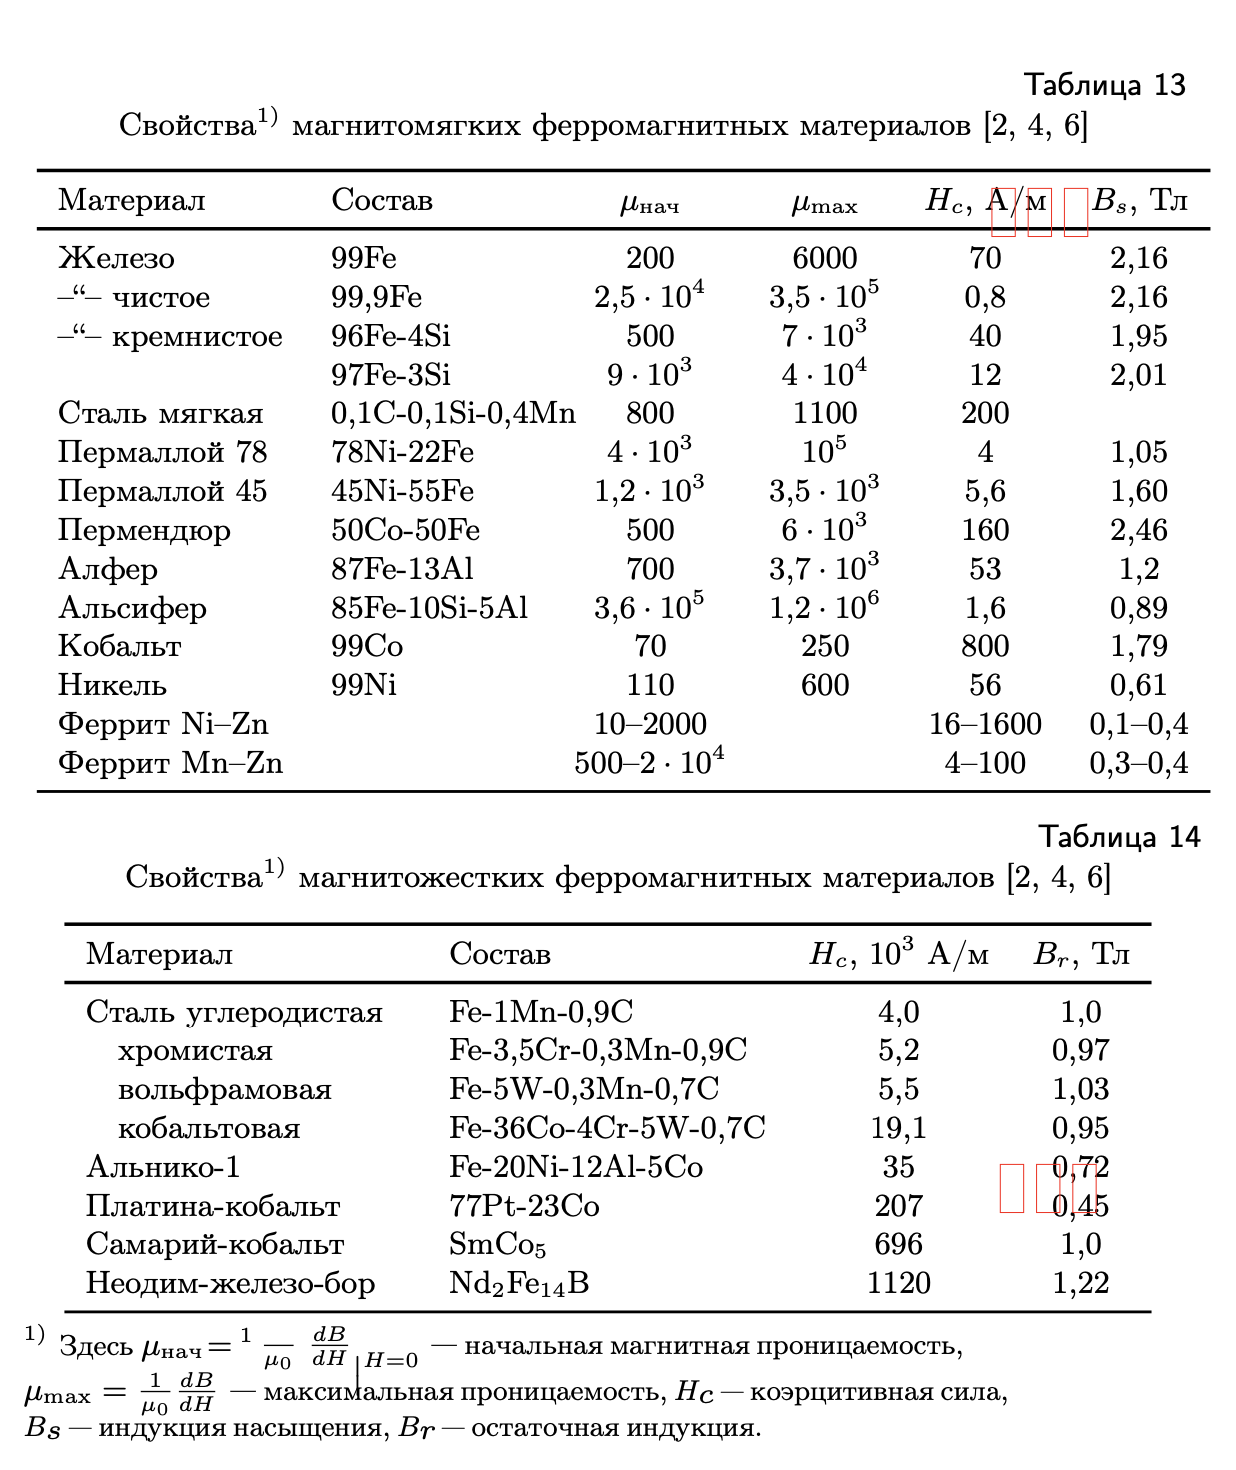